In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [14]:
df=pd.read_excel("Win_Prediction_Data.xlsx")

In [15]:
df

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
...,...,...,...,...,...,...,...,...,...
10056,Power ind,Solution 9,2019-03-18,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost
10057,Internal,Solution 6,2019-03-04,Sector 20,Others,Rudraksh Sharma,Sharavan Singh,777058.82,Won
10058,Power ind,Solution 9,2019-02-28,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost
10059,Power ind,Solution 62,2019-01-27,Sector 9,L5,Man Suddeth,Cleotilde Biron,3042058.82,Won


In [16]:
df.isnull().sum()

Client Category     79
Solution Type        0
Deal Date            0
Sector               0
Location             0
VP Name              0
Manager Name         0
Deal Cost            0
Deal Status Code     0
dtype: int64

In [17]:
#df2=df.ffill()

In [18]:
#df2.duplicated().sum()

In [19]:
df["Client Category"].value_counts()

Client Category
Others                   1763
Internal                 1454
Services_based           1202
Tech                      913
Domestic Public Bank      419
International Bank        376
Consulting                352
Finance                   339
Telecom                   327
Power ind                 264
Domestic Private Bank     262
Insurance                 247
Consumer Good             185
Automobiles               178
Infrastructure            152
Domestic Bank             134
Retail_market             126
Govt                      121
Hospitality               119
Manufacturing             117
Pharma                    110
Healthcare                 99
Electronics                81
Media_Journal              71
Industries                 66
Research Development       63
Energy                     57
Knowledge                  50
Management                 43
Govt Bank Special          41
Payment                    40
Energy                     37
e-commerce              

In [20]:
#filling null values using mode of the column
df["Client Category"].fillna(value="others",inplace=True)

In [21]:
#checking null values
df.isnull().sum()

Client Category     0
Solution Type       0
Deal Date           0
Sector              0
Location            0
VP Name             0
Manager Name        0
Deal Cost           0
Deal Status Code    0
dtype: int64

In [22]:
#removing duplicate values from the data
df.drop_duplicates(inplace=True)

In [23]:
df.duplicated().sum()

0

In [24]:
print("min",df["Deal Cost"].min())
print("min",df["Deal Cost"].min())
print("min",df["Deal Cost"].min())

min 0.0
min 0.0
min 0.0


In [25]:
df[df["Deal Cost"]==0].count()

Client Category     245
Solution Type       245
Deal Date           245
Sector              245
Location            245
VP Name             245
Manager Name        245
Deal Cost           245
Deal Status Code    245
dtype: int64

In [26]:
df["Deal Cost"]=np.where(df["Deal Cost"]==0,382352.94,df["Deal Cost"])

In [27]:
df["Deal Status Code"].value_counts()

Deal Status Code
Lost    6292
Won     3755
Name: count, dtype: int64

In [28]:
df.select_dtypes(object).columns

Index(['Client Category', 'Solution Type', 'Sector', 'Location', 'VP Name',
       'Manager Name', 'Deal Status Code'],
      dtype='object')

In [29]:
df["Deal Status Code"]=np.where(df["Deal Status Code"]=="Won",1,0)

In [30]:
df["Deal Status Code"].value_counts()

Deal Status Code
0    6292
1    3755
Name: count, dtype: int64

In [31]:
df.select_dtypes(object).columns

Index(['Client Category', 'Solution Type', 'Sector', 'Location', 'VP Name',
       'Manager Name'],
      dtype='object')

# TREATING OUTLIERS

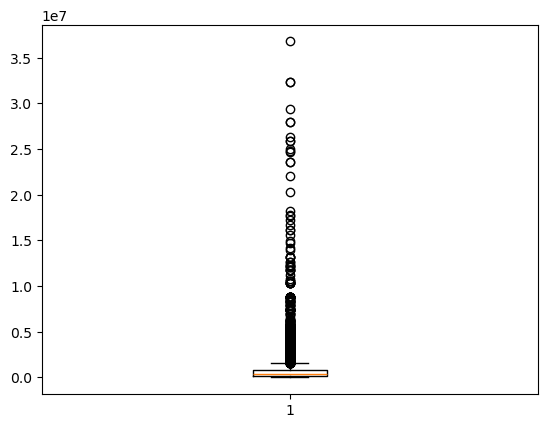

In [33]:
plt.boxplot(df["Deal Cost"])
plt.show()

In [34]:
def IQR(x):
    q1=x.quantile(.25)
    q3=x.quantile(.75)
    IQR=q3-q1
    lf=q1-(1.5*IQR)
    uf=q3+(1.5*IQR)
    print("lf-->",lf,"uf-->",uf)

In [35]:
IQR(df["Deal Cost"])

lf--> -632352.9450000001 uf--> 1602941.175


In [36]:
df["Deal Cost"]=np.where(df["Deal Cost"]>1602941.175,1602941.175,df["Deal Cost"])

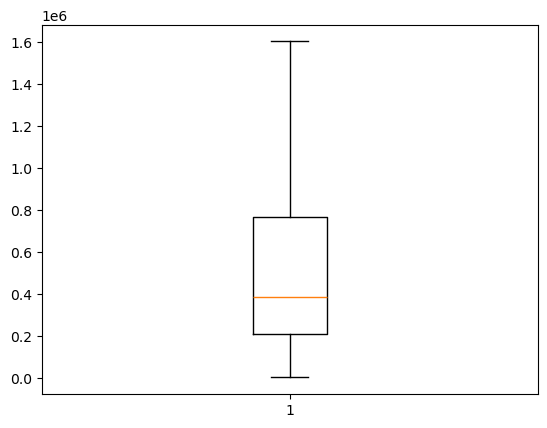

In [37]:
plt.boxplot(df["Deal Cost"])
plt.show()

# LOGISTIC REGRESSION

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [40]:
df.select_dtypes(object).columns

Index(['Client Category', 'Solution Type', 'Sector', 'Location', 'VP Name',
       'Manager Name'],
      dtype='object')

In [41]:
#making dummies
df1=pd.get_dummies(df,columns=["Client Category","Solution Type","Sector","Location","VP Name","Manager Name"],drop_first=True)
df1

,Deal Date,Deal Cost,Deal Status Code,Client Category_Automobiles,Client Category_Consulting,Client Category_Consumer Good,Client Category_Domestic Bank,Client Category_Domestic Private Bank,Client Category_Domestic Public Bank,Client Category_Electronics,...,Manager Name_shafibul,Manager Name_sharat chandran,Manager Name_sheak shakir,Manager Name_shiv kumar,Manager Name_shiv shakti singh,Manager Name_shyam kumar,Manager Name_som dutt,Manager Name_sunder paal,Manager Name_vansu dev,Manager Name_vinit katariya
0,2012-03-27,150000.000,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2012-09-25,744705.880,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2011-08-01,60000.000,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2011-04-28,60000.000,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2011-06-03,80882.350,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10056,2019-03-18,588235.290,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10057,2019-03-04,777058.820,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10058,2019-02-28,588235.290,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10059,2019-01-27,1602941.175,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
df1.drop(columns="Deal Date",inplace=True)

In [43]:
y= df1["Deal Status Code"]#target variable
x=df1.drop(columns="Deal Status Code")#independent variable

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=88)

In [45]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [46]:
print("Train accuracy",log.score(x_train,y_train))
print("Test accuracy",log.score(x_test,y_test))

Train accuracy 0.6820953091949733
Test accuracy 0.6895522388059702


# DECISION TREE

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dt=DecisionTreeClassifier(max_depth=14,
                         min_samples_leaf=1,
                          min_samples_split=80,
                         random_state=88
                         )
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=14, min_samples_split=80, random_state=88)

In [50]:
print("Train accuracy",dt.score(x_train,y_train))
print("Test accuracy",dt.score(x_test,y_test))

Train accuracy 0.7444320019907926
Test accuracy 0.700497512437811


# RANDOM FOREST

In [52]:
from sklearn.ensemble import RandomForestClassifier
rm=RandomForestClassifier(n_estimators=200,
                         max_depth=14,
                         min_samples_leaf=1,
                          min_samples_split=5,
                         random_state=88)

In [53]:
rm.fit(x_train,y_train)

RandomForestClassifier(max_depth=14, min_samples_split=5, n_estimators=200,
                       random_state=88)

In [54]:
print("Train accuracy",rm.score(x_train,y_train))
print("Test accuracy",rm.score(x_test,y_test))

Train accuracy 0.7336070673136743
Test accuracy 0.7089552238805971


# SVM

In [55]:
from sklearn import svm

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
svm1=svm.SVC()

In [58]:
sc=StandardScaler()

In [59]:
sc_fit=sc.fit(x_train)

In [106]:
x_train_sc=sc_fit.transform(x_train)

In [108]:
sc_fit_test=sc.fit(x_test)

In [110]:
x_test_sc=sc_fit_test.transform(x_test)

In [114]:
x_train1=pd.DataFrame(x_train_sc,columns=x_train.columns)
x_test1=pd.DataFrame(x_test_sc,columns=x_test.columns)

In [116]:
svm1=svm.SVC( C=1.0,
    kernel='linear',
    degree=3)

In [118]:
svm1.fit(x_train1,y_train)

SVC(kernel='linear')

In [123]:
print("Train accuracy",svm1.score(x_train1,y_train))
print("Test accuracy",svm1.score(x_test1,y_test))

Train accuracy 0.7229065571730745
Test accuracy 0.7009950248756219
